In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment 

In [2]:
data=pd.read_csv('C:/Users/USER/Desktop/DSA/titanic_dataset.csv')

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv('C:/Users/USER/Desktop/DSA/titanic_dataset.csv',index_col='PassengerId')

In [5]:
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 3. Check the basic details of the dataset 

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.shape

(891, 11)

# 4. Fill in all the missing values present in all the columns in the dataset 

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# here we have missing values to the columns age,cabin,embarked. since cabin,embarked are object type data we use mode value to replace the missing values. and in age we can use any of mean,median ,mode to replace. so we need to check the distribution of the data 

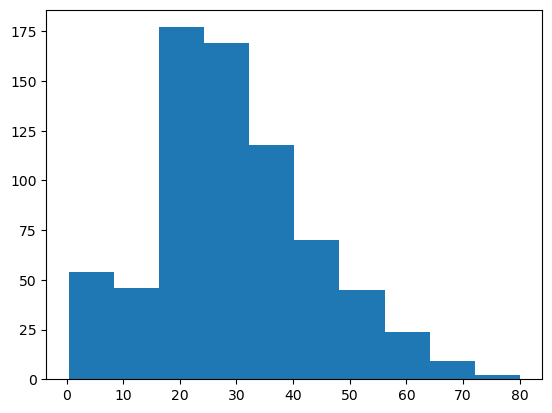

In [12]:
plt.hist(data['Age'])
plt.show()

In [13]:
# since it is a skewed distribution we can use median to replace the missing value

In [14]:
for i in [ 'Age']:
    data[i]=data[i].fillna(data[i].median())

In [15]:
for i in ['Cabin', 'Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [16]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset 

In [17]:
# to check weather there is outliers we need to plot a boxplot
# first lets check the outliers of Age column

# a)Age

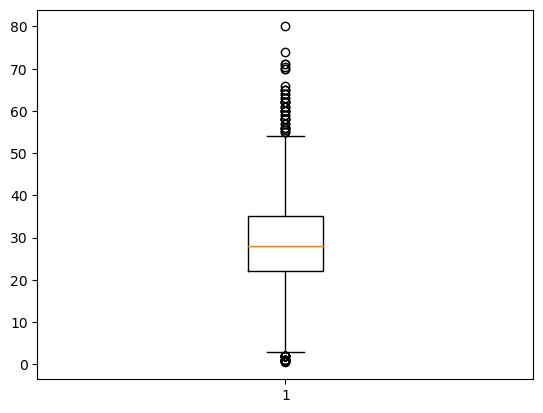

In [18]:
plt.boxplot(data['Age'])
plt.show()

In [19]:
# from the boxplot we get that there is outliers in both upper and lower limits

In [20]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

In [21]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [22]:
IQR = Q3 - Q1
print(IQR)

13.0


In [23]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [24]:
print(upper_limit)
print(lower_limit)

54.5
2.5


In [25]:
outlier=[]
for x in data['Age']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [26]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [27]:
index2=data['Age']>upper_limit

In [28]:
data.loc[index2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [29]:
index3=data['Age']<lower_limit

In [30]:
data.loc[index3].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [31]:
data.drop(data.loc[index2].index,inplace=True)

In [32]:
data.drop(data.loc[index3].index,inplace=True)

In [33]:
data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


# b)Fare

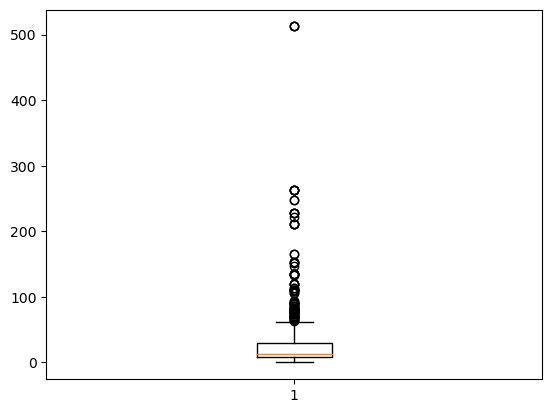

In [34]:
plt.boxplot(data['Fare'])
plt.show()

In [35]:
# from the plot we can see there is outliers in  upper limit

In [36]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

In [37]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [38]:
IQR = Q3 - Q1
print(IQR)

12.0


In [39]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [40]:
print(upper_limit)
print(lower_limit)

52.0
4.0


In [41]:
outlier=[]
for x in data['Fare']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [42]:
outlier

[71.2833,
 53.1,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 56.4958,
 263.0,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 53.1,
 79.2,
 66.6,
 61.3792,
 69.55,
 55.0,
 56.4958,
 0.0,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 52.5542,
 79.2,
 86.5,
 512.3292,
 79.65,
 0.0,
 135.6333,
 0.0,
 0.0,
 78.85,
 91.0792,
 247.5208,
 0.0,
 110.8833,
 108.9,
 56.9292,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 55.0,
 69.3,
 55.4417,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 0.0,
 55.9,
 120.0,
 81.8583,
 89.1042,
 0.0,
 0.0,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 56.4958,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 55.9,
 110.8833,
 79.65,
 78.2667,
 0.0,
 56.9292,
 153.4625,
 65.0,
 52.5542,
 77.9583,
 0.0,
 69.3,
 56.4958,
 76.7292,
 73.5,
 133.65,
 73.5,
 0.0,
 512.3292,
 76.7292,
 211.

In [43]:
index4=data['Fare']>upper_limit

In [44]:
data.loc[index4].index

Int64Index([  2,   4,  28,  32,  35,  53,  62,  63,  73,  75,
            ...
            810, 821, 827, 836, 839, 847, 850, 857, 864, 872],
           dtype='int64', name='PassengerId', length=136)

In [45]:
data.drop(data.loc[index4].index,inplace=True)

In [46]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


# c)SibSp

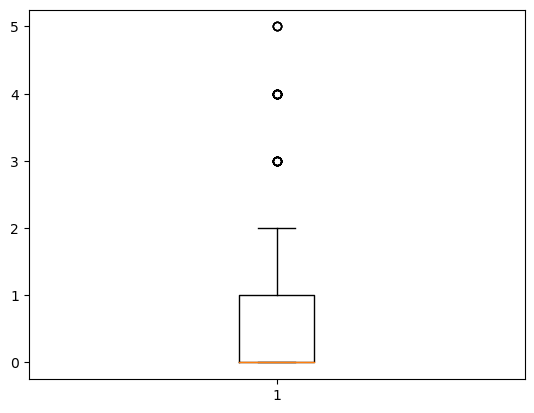

In [47]:
plt.boxplot(data['SibSp'])
plt.show()

In [48]:
# from the plot we can see there is outliers in  upper limit

In [49]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint')

In [50]:
print(Q1)
print(Q2)
print(Q3)


0.0
0.0
1.0


In [51]:
IQR = Q3 - Q1
print(IQR)

1.0


In [52]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [53]:
print(upper_limit)
print(lower_limit)

2.5
-1.5


In [54]:
outlier=[]
for x in data['Fare']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [55]:
outlier

[7.25,
 7.925,
 8.05,
 8.4583,
 51.8625,
 11.1333,
 30.0708,
 16.7,
 8.05,
 31.275,
 7.8542,
 13.0,
 18.0,
 7.225,
 26.0,
 13.0,
 8.0292,
 35.5,
 21.075,
 31.3875,
 7.225,
 7.8792,
 7.8958,
 27.7208,
 7.75,
 52.0,
 7.2292,
 8.05,
 18.0,
 11.2417,
 9.475,
 21.0,
 7.8958,
 41.5792,
 7.8792,
 8.05,
 15.5,
 7.75,
 21.6792,
 17.8,
 39.6875,
 7.8,
 26.0,
 35.5,
 10.5,
 7.2292,
 27.75,
 46.9,
 7.2292,
 27.9,
 27.7208,
 15.2458,
 10.5,
 8.1583,
 7.925,
 8.6625,
 10.5,
 46.9,
 14.4542,
 7.65,
 7.8958,
 8.05,
 12.475,
 9.0,
 9.5,
 7.7875,
 47.1,
 10.5,
 15.85,
 34.375,
 8.05,
 8.05,
 8.05,
 7.8542,
 20.575,
 8.05,
 23.0,
 26.0,
 7.8958,
 7.8958,
 8.6542,
 7.925,
 7.8958,
 7.65,
 7.775,
 7.8958,
 24.15,
 52.0,
 14.4542,
 8.05,
 9.825,
 14.4583,
 7.925,
 21.0,
 8.05,
 30.0708,
 13.0,
 11.2417,
 7.75,
 7.1417,
 22.3583,
 6.975,
 7.8958,
 7.05,
 14.5,
 26.0,
 13.0,
 15.0458,
 26.2833,
 9.2167,
 15.2458,
 7.75,
 15.85,
 6.75,
 11.5,
 36.75,
 7.7958,
 34.375,
 26.0,
 13.0,
 12.525,
 14.5,
 7.3125,
 7.

In [56]:
index5=data['SibSp']>upper_limit

In [57]:
data.loc[index5].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [58]:
data.drop(data.loc[index5].index,inplace=True)

In [60]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,B96 B98,S


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [63]:
data2=data.drop(['Survived','Name','Pclass','Pclass','Sex','Ticket','Cabin','Embarked'],axis=1)

In [64]:
data2

,Age,SibSp,Parch,Fare
PassengerId,,,,
1,22.0,1,0,7.2500
3,26.0,0,0,7.9250
5,35.0,0,0,8.0500
6,28.0,0,0,8.4583
7,54.0,0,0,51.8625
...,...,...,...,...
887,27.0,0,0,13.0000
888,19.0,0,0,30.0000
889,28.0,1,2,23.4500


In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
MinMax= MinMaxScaler(feature_range=(0,1))

In [67]:
x1=MinMax.fit_transform(data2)

In [68]:
type(x1)

numpy.ndarray

In [69]:
x1

array([[0.37254902, 0.5       , 0.        , 0.13942308],
       [0.45098039, 0.        , 0.        , 0.15240385],
       [0.62745098, 0.        , 0.        , 0.15480769],
       ...,
       [0.49019608, 0.5       , 0.33333333, 0.45096154],
       [0.45098039, 0.        , 0.        , 0.57692308],
       [0.56862745, 0.        , 0.        , 0.14903846]])

In [70]:
x1.shape

(660, 4)

In [71]:
# now the values are in an array format. if we need to convert them back as dataframe 

In [72]:
x1=pd.DataFrame(x1,columns=['Age','SibSp','Parch','Fare'])

In [73]:
x1

,Age,SibSp,Parch,Fare
0,0.372549,0.5,0.000000,0.139423
1,0.450980,0.0,0.000000,0.152404
2,0.627451,0.0,0.000000,0.154808
3,0.490196,0.0,0.000000,0.162660
4,1.000000,0.0,0.000000,0.997356
...,...,...,...,...
655,0.470588,0.0,0.000000,0.250000
656,0.313725,0.0,0.000000,0.576923
657,0.490196,0.5,0.333333,0.450962
658,0.450980,0.0,0.000000,0.576923
